<a href="https://colab.research.google.com/github/myconcordia/INSE6220/blob/main/Sample_Project_Classification_with_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Multiclass Classification with PyCaret**

Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification).

**Install Pycaret**

In [1]:
#!pip install CMake

In [2]:
# install slim version (default): if you get an error message, run it again
#!pip install pycaret

**Import Libraries**

In [3]:
import pycaret


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)
from scipy.stats import beta
from scipy.stats import f

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:
font = {
    'family' : 'Arial',
    'weight' : 'bold',
    'size'   : 13
    }
plt.rc('font', **font)

In [6]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2


**Dataset**

The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.

The data set can be used for the tasks of classification and cluster analysis.


Attribute Information:

To construct the data, seven geometric parameters of wheat kernels were measured:
1. area A,
2. perimeter P,
3. compactness C = 4*pi*A/P^2,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.
All of these parameters were real-valued continuous.

https://archive.ics.uci.edu/ml/datasets/seeds

In [7]:
#read cvs file into dataframe
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header = None)
df.columns = ['Label', 'Alcohol', 'Malic_Acid', 'Ash', 'Alca_Ash', 'Magnesium', 'Tphenols', 'Flavanoids' , 'Nonflavanoid_phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'Diluted', 'Proline']
df.head(25)

Label  Alcohol  Malic_Acid   Ash  Alca_Ash  Magnesium  Tphenols  \
0       1    14.23        1.71  2.43      15.6        127      2.80   
1       1    13.20        1.78  2.14      11.2        100      2.65   
2       1    13.16        2.36  2.67      18.6        101      2.80   
3       1    14.37        1.95  2.50      16.8        113      3.85   
4       1    13.24        2.59  2.87      21.0        118      2.80   
5       1    14.20        1.76  2.45      15.2        112      3.27   
6       1    14.39        1.87  2.45      14.6         96      2.50   
7       1    14.06        2.15  2.61      17.6        121      2.60   
8       1    14.83        1.64  2.17      14.0         97      2.80   
9       1    13.86        1.35  2.27      16.0         98      2.98   
10      1    14.10        2.16  2.30      18.0        105      2.95   
11      1    14.12        1.48  2.32      16.8         95      2.20   
12      1    13.75        1.73  2.41      16.0         89      2.60   
13      1    14.75        1.73  2.39      11.4         91      3.10   
14      1    14.38        1.87  2.38      12.0        102      3.30   
15      1    13.63        1.81  2.70      17.2        112      2.85   
16      1    14.30        1.92  2.72      20.0        120      2.80   
17      1    13.83        1.57  2.62      20.0        115      2.95   
18      1    14.19        1.59  2.48      16.5        108      3.30   
19      1    13.64        3.10  2.56      15.2        116      2.70   
20      1    14.06        1.63  2.28      16.0        126      3.00   
21      1    12.93        3.80  2.65      18.6        102      2.41   
22      1    13.71        1.86  2.36      16.6        101      2.61   
23      1    12.85        1.60  2.52      17.8         95      2.48   
24      1    13.50        1.81  2.61      20.0         96      2.53   

    Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color intensity   Hue  \
0         3.06                  0.28             2.29             5.64  1.04   
1         2.76                  0.26             1.28             4.38  1.05   
2         3.24                  0.30             2.81             5.68  1.03   
3         3.49                  0.24             2.18             7.80  0.86   
4         2.69                  0.39             1.82             4.32  1.04   
5         3.39                  0.34             1.97             6.75  1.05   
6         2.52                  0.30             1.98             5.25  1.02   
7         2.51                  0.31             1.25             5.05  1.06   
8         2.98                  0.29             1.98             5.20  1.08   
9         3.15                  0.22             1.85             7.22  1.01   
10        3.32                  0.22             2.38             5.75  1.25   
11        2.43                  0.26             1.57             5.00  1.17   
12        2.76                  0.29             1.81             5.60  1.15   
13        3.69                  0.43             2.81             5.40  1.25   
14        3.64                  0.29             2.96             7.50  1.20   
15        2.91                  0.30             1.46             7.30  1.28   
16        3.14                  0.33             1.97             6.20  1.07   
17        3.40                  0.40             1.72             6.60  1.13   
18        3.93                  0.32             1.86             8.70  1.23   
19        3.03                  0.17             1.66             5.10  0.96   
20        3.17                  0.24             2.10             5.65  1.09   
21        2.41                  0.25             1.98             4.50  1.03   
22        2.88                  0.27             1.69             3.80  1.11   
23        2.37                  0.26             1.46             3.93  1.09   
24        2.61                  0.28             1.66             3.52  1.12   

    Diluted  Proline  
0      3.92     1065  
1      3.40     1050  
2      

In [8]:
df = df.drop(df.columns[[1, 2, 4, 5, 8, 10, -1,11]], axis=1)
Label = df['Label']
df.pop('Label')
df.insert(5, "class", Label, True)
df.columns  = ['Ash', 'Tphenols', 'Flavanoids', 'Proanthocyanins', 'Diluted', 'class']
df.head(n=25)

Ash  Tphenols  Flavanoids  Proanthocyanins  Diluted  class
0   2.43      2.80        3.06             2.29     3.92      1
1   2.14      2.65        2.76             1.28     3.40      1
2   2.67      2.80        3.24             2.81     3.17      1
3   2.50      3.85        3.49             2.18     3.45      1
4   2.87      2.80        2.69             1.82     2.93      1
5   2.45      3.27        3.39             1.97     2.85      1
6   2.45      2.50        2.52             1.98     3.58      1
7   2.61      2.60        2.51             1.25     3.58      1
8   2.17      2.80        2.98             1.98     2.85      1
9   2.27      2.98        3.15             1.85     3.55      1
10  2.30      2.95        3.32             2.38     3.17      1
11  2.32      2.20        2.43             1.57     2.82      1
12  2.41      2.60        2.76             1.81     2.90      1
13  2.39      3.10        3.69             2.81     2.73      1
14  2.38      3.30        3.64             2.96     3.00      1
15  2.70      2.85        2.91             1.46     2.88      1
16  2.72      2.80        3.14             1.97     2.65      1
17  2.62      2.95        3.40             1.72     2.57      1
18  2.48      3.30        3.93             1.86     2.82      1
19  2.56      2.70        3.03             1.66     3.36      1
20  2.28      3.00        3.17             2.10     3.71      1
21  2.65      2.41        2.41             1.98     3.52      1
22  2.36      2.61        2.88             1.69     4.00      1
23  2.52      2.48        2.37             1.46     3.63      1
24  2.61      2.53        2.61             1.66     3.82      1

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ash              178 non-null    float64
 1   Tphenols         178 non-null    float64
 2   Flavanoids       178 non-null    float64
 3   Proanthocyanins  178 non-null    float64
 4   Diluted          178 non-null    float64
 5   class            178 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 8.5 KB


In [10]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [11]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

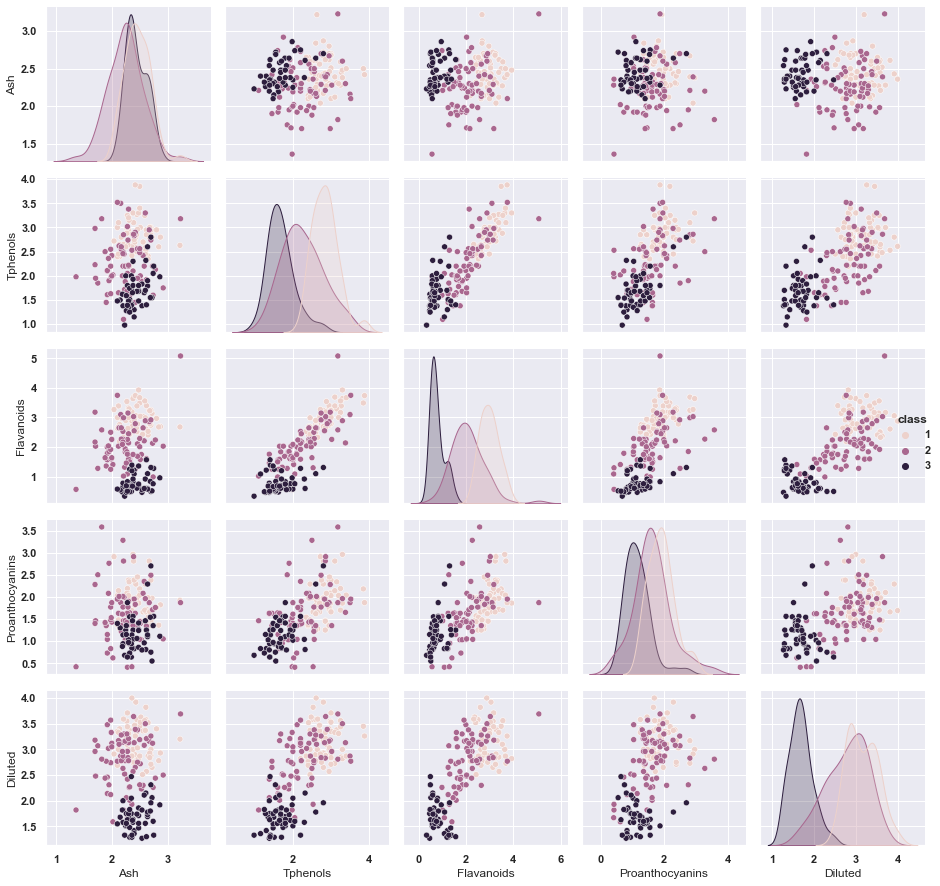

In [12]:
SMALL_SIZE = 20
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
#plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
#plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

sns.pairplot(df, hue='class')

plt.tight_layout()
#plt.savefig('pyCaretImages/pairplot.eps', rasterized=True)
plt.show()

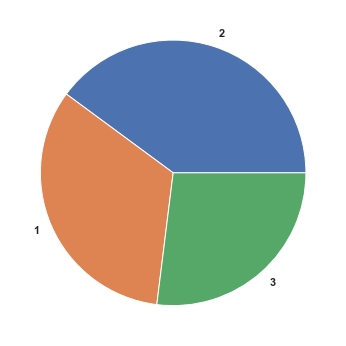

In [13]:
y =df['class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.tight_layout()
plt.savefig('pyCaretImages/pieChart.eps', rasterized=True)
plt.show()

**Data Matrix**

In [14]:
X = df.drop(columns=['class'])
X.head(10)

Ash  Tphenols  Flavanoids  Proanthocyanins  Diluted
0  2.43      2.80        3.06             2.29     3.92
1  2.14      2.65        2.76             1.28     3.40
2  2.67      2.80        3.24             2.81     3.17
3  2.50      3.85        3.49             2.18     3.45
4  2.87      2.80        2.69             1.82     2.93
5  2.45      3.27        3.39             1.97     2.85
6  2.45      2.50        2.52             1.98     3.58
7  2.61      2.60        2.51             1.25     3.58
8  2.17      2.80        2.98             1.98     2.85
9  2.27      2.98        3.15             1.85     3.55

In [15]:
X.describe().transpose()

count      mean       std   min     25%    50%     75%   max
Ash              178.0  2.366517  0.274344  1.36  2.2100  2.360  2.5575  3.23
Tphenols         178.0  2.295112  0.625851  0.98  1.7425  2.355  2.8000  3.88
Flavanoids       178.0  2.029270  0.998859  0.34  1.2050  2.135  2.8750  5.08
Proanthocyanins  178.0  1.590899  0.572359  0.41  1.2500  1.555  1.9500  3.58
Diluted          178.0  2.611685  0.709990  1.27  1.9375  2.780  3.1700  4.00

**Standardize the Data**

In [16]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

Ash  Tphenols  Flavanoids  Proanthocyanins   Diluted
0  0.232053  0.808997    1.034819         1.224884  1.847920
1 -0.827996  0.568648    0.733629        -0.544721  1.113449
2  1.109334  0.808997    1.215533         2.135968  0.788587
3  0.487926  2.491446    1.466525         1.032155  1.184071
4  1.840403  0.808997    0.663351         0.401404  0.449601
5  0.305159  1.562093    1.366128         0.664217  0.336606
6  0.305159  0.328298    0.492677         0.681738  1.367689
7  0.890014  0.488531    0.482637        -0.597284  1.367689
8 -0.718336  0.808997    0.954502         0.681738  0.336606
9 -0.352802  1.097417    1.125176         0.453967  1.325316

In [17]:
X.describe().transpose()

count          mean       std       min       25%       50%  \
Ash              178.0 -8.657245e-16  1.002821 -3.679162 -0.572122 -0.023821   
Tphenols         178.0 -2.972030e-16  1.002821 -2.107246 -0.885468  0.095960   
Flavanoids       178.0 -4.016762e-16  1.002821 -1.695971 -0.827539  0.106150   
Proanthocyanins  178.0 -1.699639e-16  1.002821 -2.069034 -0.597284 -0.062898   
Diluted          178.0  2.919013e-16  1.002821 -1.895054 -0.952248  0.237735   

                      75%       max  
Ash              0.698109  3.156325  
Tphenols         0.808997  2.539515  
Flavanoids       0.849085  3.062832  
Proanthocyanins  0.629175  3.485073  
Diluted          0.788587  1.960915

**Observations and variables**

In [18]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

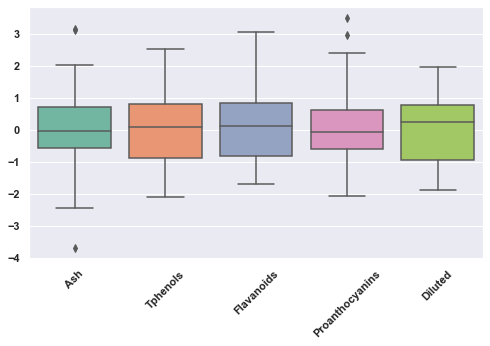

In [19]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);
plt.tight_layout()
plt.savefig('pyCaretImages/boxPlot.eps', rasterized=True)

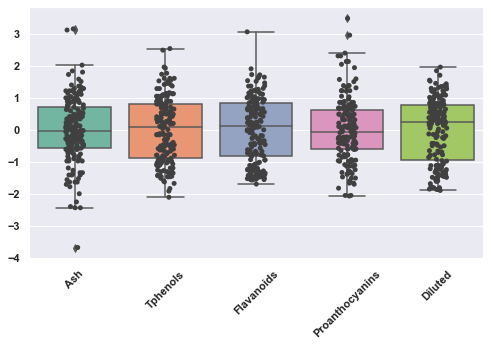

In [20]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);
plt.tight_layout()
plt.savefig('pyCaretImages/stripplot.eps', rasterized=True)

**Correlation Matrix**

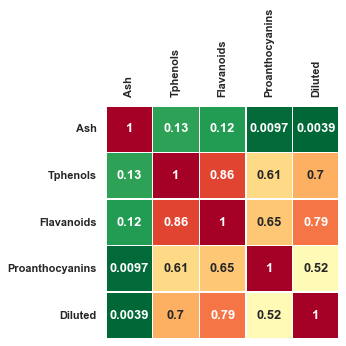

In [21]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);
plt.tight_layout()
plt.savefig('pyCaretImages/ConvMatrix.eps', rasterized=True)
#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

##**Principal Component Analysis (PCA)**

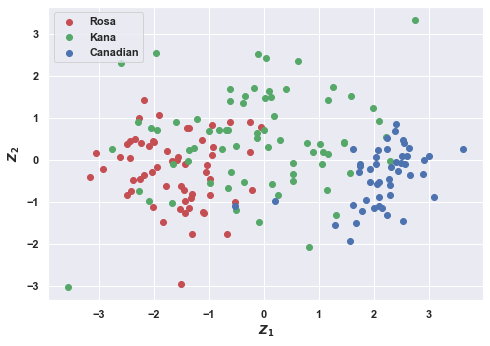

In [22]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(Rosa)->0,  2(Kama)->1, 3(Canadian)->2
idx_Rosa = np.where(y == 1)
idx_Kana = np.where(y == 2)
idx_Canadian = np.where(y == 3)

plt. figure()
plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
plt.tight_layout()
#plt.savefig('pyCaretImages/scatterPlot.eps', rasterized=True)

**Eigenvectors**

Eigenvector matrix:
[[-0.06477926 -0.98605198  0.05258944 -0.14178217 -0.02524503]
 [-0.52017019 -0.05285256 -0.1211773   0.6549974  -0.53190605]
 [-0.54028519 -0.02106635 -0.14572462  0.19597868  0.80498747]
 [-0.442345    0.11229336  0.85046244 -0.24929057 -0.07930296]
 [-0.48749301  0.10887844 -0.48788154 -0.67106094 -0.24928872]]
Eigenvalues :
[3.10828631 1.01353484 0.50657535 0.28214947 0.11770262]


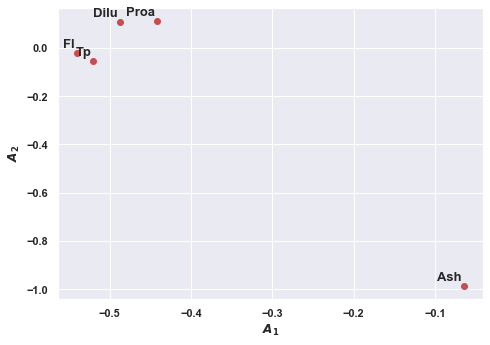

In [23]:
A = pca.components_.T 
print(f'Eigenvector matrix:\n{A}')
eigenValues = pca.explained_variance_
print(f'Eigenvalues :\n{eigenValues}')
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
clearLabels  = ['Ash', 'Tp', 'Fl', 'Proa', 'Dilu', 'class']
i=0
for label, x, y in zip(clearLabels, A[:, 0], A[:, 1]):
    plt.annotate(clearLabels[i], xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
    i = i + 1
plt.tight_layout()
plt.savefig('pyCaretImages/scatterLabel.eps', rasterized=True)

/var/hormone03/opt/anaconda3/lib/python3.8/site-packages/matplotlib/collections.py:886: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


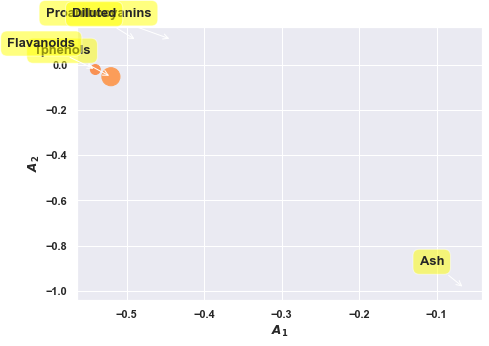

In [24]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
plt.tight_layout()
#plt.savefig('pyCaretImages/label2.eps', rasterized=True)

**Scree plot**

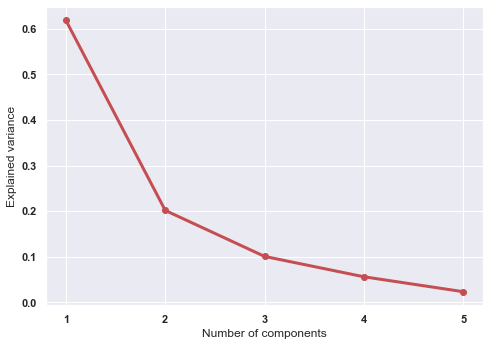

In [25]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.tight_layout()
plt.savefig('pyCaretImages/scree.eps', rasterized=True)

**Explained Variance**

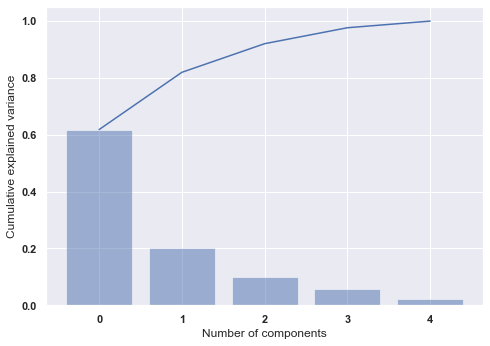

In [26]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.tight_layout()
#plt.savefig('pyCaretImages/explainedVariance.eps', rasterized=True)

**Biplot**

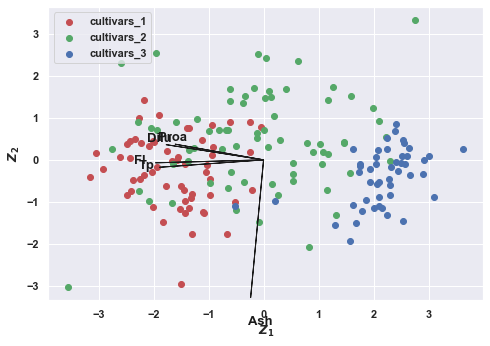

In [27]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
clearLabels  = ['Ash', 'Tp', 'Fl', 'Proa', 'Dilu', 'class']
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,clearLabels[i], color='k')

plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='cultivars_1')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='cultivars_2')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='cultivars_3')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('pyCaretImages/plot5.eps', rasterized=True)

##**Using PCA Library**

In [28]:
#!pip install pca

In [29]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [5] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [4] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


**Principal Components**

In [30]:
out['PC']

PC1       PC2       PC3       PC4
0   -2.437615  0.045372 -0.096475 -0.845626
1   -0.940370  0.831000 -1.225855  0.022235
2   -2.478678 -0.836511  1.214997 -0.450841
3   -3.153720 -0.398870 -0.189833  0.798228
4   -1.295172 -1.777438  0.024114 -0.002818
..        ...       ...       ...       ...
173  2.274436 -0.457298  0.152725  0.090008
174  1.944055 -0.537372  0.760277  0.245687
175  2.250228  0.262835  0.678134  0.153706
176  2.053030 -0.107645  0.811655  0.052786
177  1.687653 -1.501541  0.643284  0.363581

[178 rows x 4 columns]

**Scatter plot**

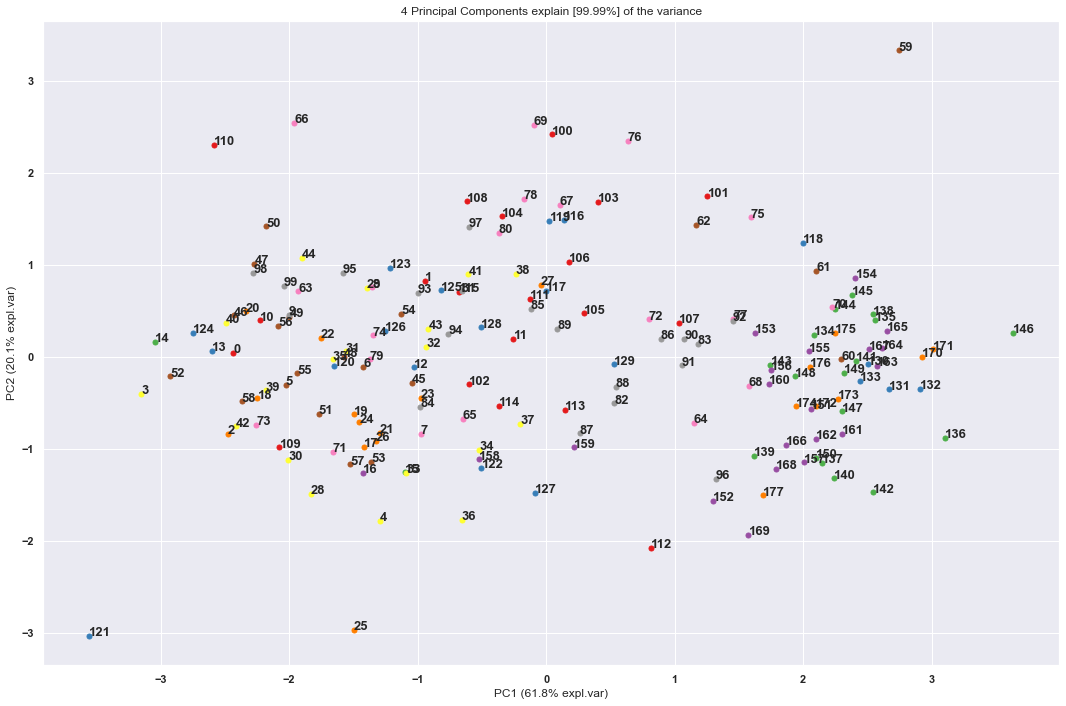

In [31]:
model.scatter(label=True, legend=False)
plt.tight_layout()
plt.savefig('pyCaretImages/plot6.eps', rasterized=True)

**Eigenvectors**

In [32]:
A = out['loadings'].T
print(f'Eigenvector matrix:\n{A}')
eigenValues = out['explained_var']
print(f'\n EigenValues :\{eigenValues}')


Eigenvector matrix:
                      PC1       PC2       PC3       PC4
Ash             -0.064779 -0.986052  0.052589 -0.141782
Tphenols        -0.520170 -0.052853 -0.121177  0.654997
Flavanoids      -0.540285 -0.021066 -0.145725  0.195979
Proanthocyanins -0.442345  0.112293  0.850462 -0.249291
Diluted         -0.487493  0.108878 -0.487882 -0.671061

 EigenValues :\[0.61816481 0.81973297 0.92047885 0.97659173 1.        ]


In [33]:
'''
alpha = 0.05
p=Z.shape[1]
n=Z.shape[0]

UCL=((n-1)**2/n )*beta.ppf(1-alpha, p / 2 , (n-p-1)/ 2)
UCL2=p*(n+1)*(n-1)/(n*(n-p) )*f.ppf(1-alpha, p , n-p)
Tsquare=np.array([0]*Z.shape[0])
for i in range(Z.shape[0]):
  Tsquare[i] = np.matmul(np.matmul(np.transpose(Z[i]),np.diag(1/Lambda) ) , Z[i])

fig, ax = plt.subplots()
ax.plot(Tsquare,'-b', marker='o', mec='y',mfc='r' )
ax.plot([UCL for i in range(len(Z1))], "--g", label="UCL")
plt.ylabel('Hotelling $T^2$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))
#plt.savefig('image_1/Hotelling_T2.eps')
'''

'\nalpha = 0.05\np=Z.shape[1]\nn=Z.shape[0]\n\nUCL=((n-1)**2/n )*beta.ppf(1-alpha, p / 2 , (n-p-1)/ 2)\nUCL2=p*(n+1)*(n-1)/(n*(n-p) )*f.ppf(1-alpha, p , n-p)\nTsquare=np.array([0]*Z.shape[0])\nfor i in range(Z.shape[0]):\n  Tsquare[i] = np.matmul(np.matmul(np.transpose(Z[i]),np.diag(1/Lambda) ) , Z[i])\n\nfig, ax = plt.subplots()\nax.plot(Tsquare,\'-b\', marker=\'o\', mec=\'y\',mfc=\'r\' )\nax.plot([UCL for i in range(len(Z1))], "--g", label="UCL")\nplt.ylabel(\'Hotelling $T^2$\')\nlegend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))\n#plt.savefig(\'image_1/Hotelling_T2.eps\')\n'

In [34]:
#print(np.argwhere(Tsquare>UCL))


In [35]:
'''
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(Z1,'-b', marker='o', mec='y',mfc='r')
ax1.plot([3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--g", label="UCL")
ax1.plot([-3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--b", label='LCL')
ax1.plot([0 for i in range(len(Z1))], "-", color='black',label='CL')
ax1.set_ylabel('$Z_1$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

ax2.plot(Z2,'-b', marker='o', mec='y',mfc='r')
ax2.plot([3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--g", label="UCL")
ax2.plot([-3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--b", label='LCL')
ax2.plot([0 for i in range(len(Z2))], "-", color='black',label='CL')
ax2.set_ylabel('$Z_2$')
ax2.set_xlabel('Sample Number')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))
plt.legend()
#plt.savefig('image_1/ControlCHART.eps')
'''

'\nfig, (ax1, ax2) = plt.subplots(2,1)\nax1.plot(Z1,\'-b\', marker=\'o\', mec=\'y\',mfc=\'r\')\nax1.plot([3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--g", label="UCL")\nax1.plot([-3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--b", label=\'LCL\')\nax1.plot([0 for i in range(len(Z1))], "-", color=\'black\',label=\'CL\')\nax1.set_ylabel(\'$Z_1$\')\nlegend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))\n\nax2.plot(Z2,\'-b\', marker=\'o\', mec=\'y\',mfc=\'r\')\nax2.plot([3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--g", label="UCL")\nax2.plot([-3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--b", label=\'LCL\')\nax2.plot([0 for i in range(len(Z2))], "-", color=\'black\',label=\'CL\')\nax2.set_ylabel(\'$Z_2$\')\nax2.set_xlabel(\'Sample Number\')\nlegend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))\nplt.legend()\n#plt.savefig(\'image_1/ControlCHART.eps\')\n'

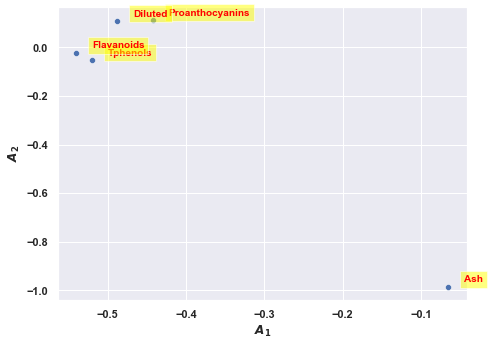

In [36]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))
plt.tight_layout()
#plt.savefig('pyCaretImages/plot7.eps', rasterized=True)

**Scree Plot**

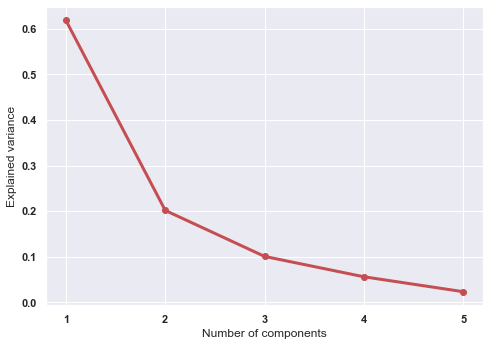

In [37]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.tight_layout()
plt.savefig('pyCaretImages/acreePCA.eps', rasterized=True)
plt.show()

**Explained Variance Plot**

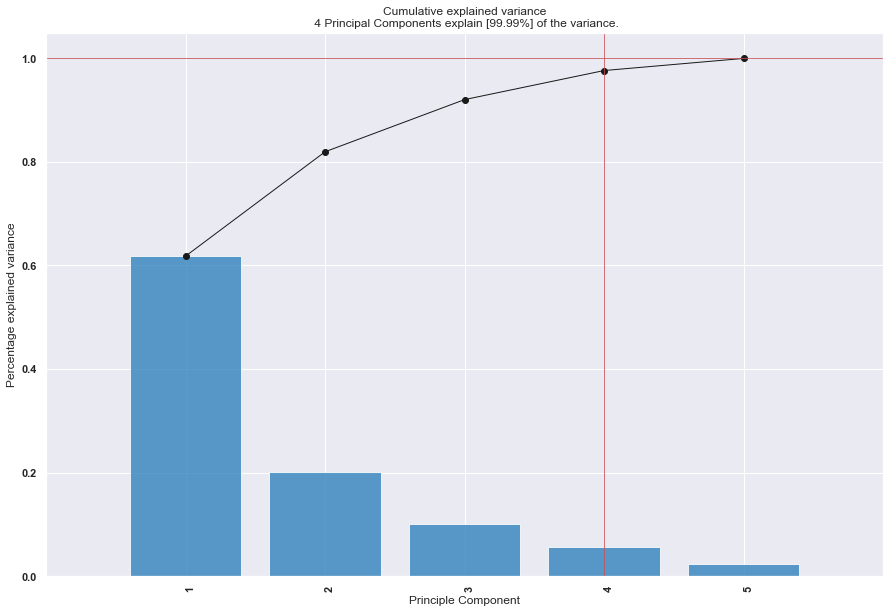

<Figure size 504x360 with 0 Axes>

In [38]:
model.plot();
plt.tight_layout()
plt.savefig('pyCaretImages/striexplaV_PCApplot.eps', rasterized=True)

**Biplot**

[pca] >Plot PC1 vs PC2 with loadings.


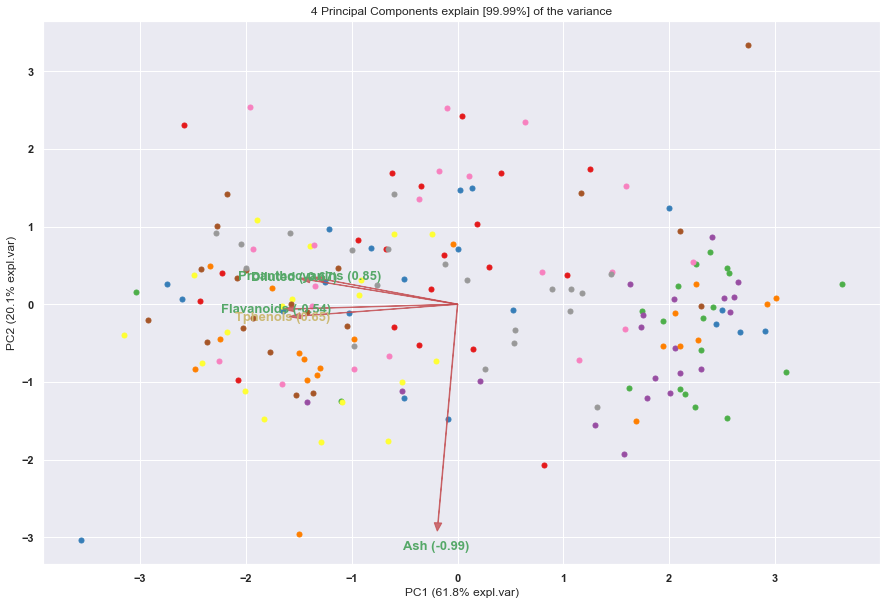

<Figure size 504x360 with 0 Axes>

In [39]:
model.biplot(label=False, legend=False)
plt.tight_layout()
plt.savefig('pyCaretImages/plot8.eps', rasterized=True)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


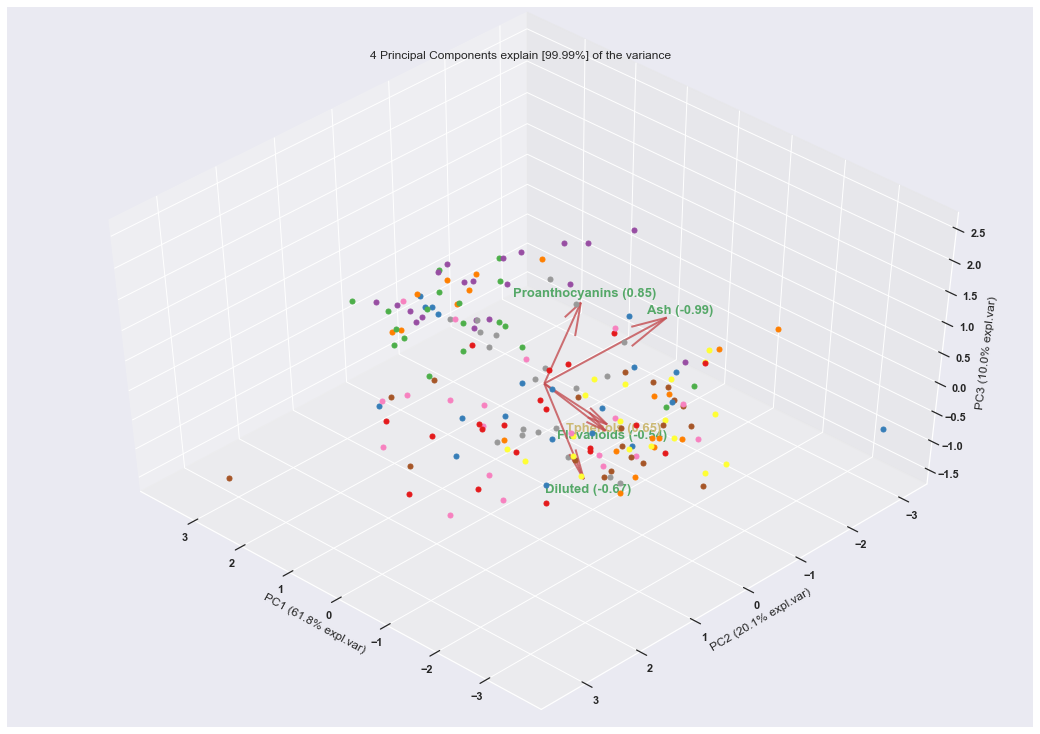

<Figure size 504x360 with 0 Axes>

In [40]:
model.biplot3d(legend=False)
plt.tight_layout()
plt.savefig('pyCaretImages/plot9.eps', rasterized=True)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


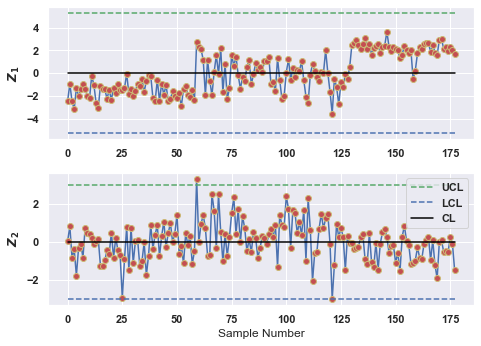

In [41]:
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(Z1,'-b', marker='o', mec='y',mfc='r')
ax1.plot([3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--g", label="UCL")
ax1.plot([-3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--b", label='LCL')
ax1.plot([0 for i in range(len(Z1))], "-", color='black',label='CL')
ax1.set_ylabel('$Z_1$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

ax2.plot(Z2,'-b', marker='o', mec='y',mfc='r')
ax2.plot([3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--g", label="UCL")
ax2.plot([-3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--b", label='LCL')
ax2.plot([0 for i in range(len(Z2))], "-", color='black',label='CL')
ax2.set_ylabel('$Z_2$')
ax2.set_xlabel('Sample Number')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))
plt.legend()
plt.tight_layout()
#plt.savefig('pyCaretImages/Contr.eps')

#**Classification**

**Using PyCaret**

In [42]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'2.3.6'

PyCaret uses interactive plotting ability. In order to render interactive plots in Google Colab, run the below line of code in your colab notebook.

In [43]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In order to demonstrate the predict_model() function on unseen data, a sample of 21 observations has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 21 records were not available at the time when the machine learning experiment was performed.

In [44]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (160, 6)
Unseen Data For Predictions: (18, 6)


**Setting up the Environment in PyCaret**

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [45]:
from pycaret.classification import *
clf = setup(data=data, target='class', train_size=0.7, session_id=123)

Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

* **session_id** : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

* **Target Type** : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

* **Label Encoded** : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. 

* **Original Data** : Displays the original shape of the dataset. In this experiment (189, 8) means 189 samples and 8 features including the class column.

* **Missing Values** : When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.

* **Numeric Features** : The number of features inferred as numeric. In this dataset, 7 out of 8 features are inferred as numeric.

* **Categorical Features** : The number of features inferred as categorical. In this dataset, there are no categorical features.

* **Transformed Train Set** : Displays the shape of the transformed training set. Notice that the original shape of (189, 8) is transformed into (132, 7) for the transformed train set.

* **Transformed Test Set** : Displays the shape of the transformed test/hold-out set. There are 57 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline. 

**Comparing All Models**

In [46]:
 #show the best model and their statistics
 best_model = compare_models() 

In [47]:
best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

**Create a Model**

create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows Accuracy, Recall, Precision, F1, Kappa and MCC by fold.

For the remaining part of this tutorial, we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

* Decision Tree Classifier ('dt')
* K Neighbors Classifier ('knn')
* Logistic Regression ('lr')

There are many classifiers available in the model library of PyCaret. Please view the create_model() docstring for the list of all available models.

**Create Decision Tree Classifier**

In [48]:
dt = create_model('dt')

In [49]:
#trained model object is stored in the variable 'dt'. 
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Tune a Model:** How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

**Tune Decision Tree Model**

In [50]:
tuned_dt = tune_model(dt)

In [51]:
#tuned model object is stored in the variable 'tuned_dt'. 
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Evaluate Decision Tree Model**

Update statmodels

In [52]:
#!pip install statsmodels --upgrade

How to analyze model performance using various plots

In [53]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create K Neighbors Model**

In [54]:
knn = create_model('knn')

**Tune K Neighbors Model**

In [55]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

**Evaluate K Neighbors Model**

In [56]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Logistic Regression Model**

In [57]:
lr = create_model('lr')

**Tune Logistic Regression Model**

In [58]:
tuned_lr = tune_model(lr)

**Evaluate Logistic Regression Model**

In [59]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Random Forest Model**

In [60]:
rf = create_model('rf')

**Tune Random Forest Model**

In [61]:
tuned_rf = tune_model(rf)

**Evaluate Random Forest Model**

In [62]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Tune the Best Model**

In [63]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

In [64]:
tuned_best_model

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0005,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=260, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [65]:
evaluate_model(tuned_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

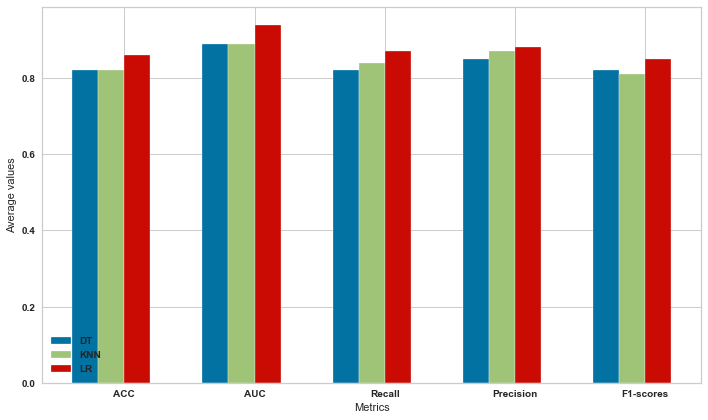

In [66]:
X = ['ACC', 'AUC', 'Recall', 'Precision', 'F1-scores']

DT = [0.82, 0.89, 0.82,0.85,0.82]
KNN = [0.82, 0.89, 0.84, 0.87, 0.81]
LR = [0.86, 0.94, 0.87, 0.88, 0.85]
  
X_axis = np.arange(len(X))
plt.figure(figsize=(10,6)) 
plt.bar(X_axis - 0.3, DT, 0.2, label = 'DT')
plt.bar(X_axis - 0.1, KNN, 0.2, label = 'KNN')
plt.bar(X_axis + 0.1, LR, 0.2, label = 'LR')
  
plt.xticks(X_axis, X)
plt.xlabel("Metrics")
plt.ylabel("Average values")
plt.legend(loc='lower left')
plt.tight_layout()
plt.savefig('pyCaretImages/modelsWithout_PC.eps')
plt.show()

#**Classification + PCA**

In [67]:
clf_pca = setup(data=data, target='class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

In [68]:
#show the best model and their statistics
best_model_pca = compare_models()

In [69]:
best_model_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Tune the Best Model**

In [70]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

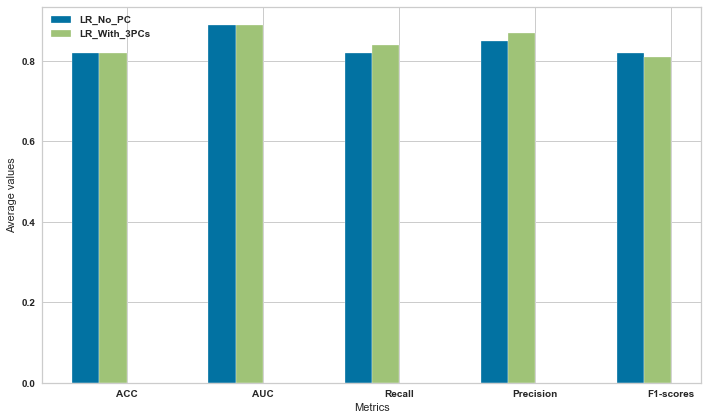

In [71]:
X = ['ACC', 'AUC', 'Recall', 'Precision', 'F1-scores']

LR_No_PC = [0.86, 0.94, 0.87, 0.88, 0.85]
LR_With_3PCs = [0.84, 0.92, 0.85, 0.86, 0.83]

X_axis = np.arange(len(X))
plt.figure(figsize=(10,6)) 
plt.bar(X_axis - 0.3, DT, 0.2, label = 'LR_No_PC')
plt.bar(X_axis - 0.1, KNN, 0.2, label = 'LR_With_3PCs')

  
plt.xticks(X_axis, X)
plt.xlabel("Metrics")
plt.ylabel("Average values")
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('pyCaretImages/ModelCompare.eps')
plt.show()

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [72]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Note:** The AUC metric is not available for Multiclass classification however the column will still be shown with zero values to maintain consistency between the Binary Classification and Multiclass Classification display grids.

#**Explainable AI with Shapley values**

Shapley values are a widely used approach from cooperative game theory that come with desirable properties.

In [73]:
#!pip install shap

In [74]:
import shap

In [75]:
rf_pca = create_model('rf')

In [76]:
tuned_rf_pca = tune_model(rf_pca)

**SHAP Summary Plot**

Rather than using a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples. 

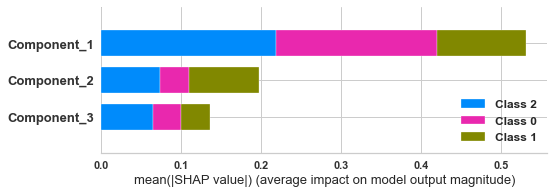

<Figure size 576x396 with 0 Axes>

In [77]:
interpret_model(tuned_rf_pca, plot='summary')
plt.tight_layout()
plt.savefig('pyCaretImages/interpret_model.eps', rasterized=True)
plt.show()

In [78]:
#explainer = shap.TreeExplainer(tuned_rf_pca)
#X = df.drop('class', axis=1)
#shap_values = explainer.shap_values(X)
#shap.summary_plot(shap_values, X)

**Visualize a single prediction**

In [79]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

From the above the plot, we can seethe "base value," which is defined as the mean predicted target; and f(x), which is the prediction for a selected observation (i.e. observation number 32). The red-colored features increased the predicted value, while the blue-colored features decreased it. The size of each feature (i.e. Principal Component) indicates the impact it has on the model.

**Visualize many predictions**

In [80]:
interpret_model(tuned_rf_pca, plot='reason')